# DECISION TREE ALGORITHM

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score  


In [42]:
dataset = pd.read_csv(r"C:\Users\rocky\Downloads\bike_buyers.csv")

In [43]:
dataset

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [44]:
newdataset=dataset.drop(['ID','Age','Cars'] ,axis=1)

In [45]:
newdataset

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0-1 Miles,Europe,No
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,0-1 Miles,Europe,No
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2-5 Miles,Europe,No
3,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,5-10 Miles,Pacific,Yes
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0-1 Miles,Europe,Yes
...,...,...,...,...,...,...,...,...,...,...
995,Married,Male,60000.0,2.0,High School,Professional,Yes,2-5 Miles,North America,Yes
996,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,2-5 Miles,North America,Yes
997,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0-1 Miles,North America,Yes
998,Single,Male,100000.0,3.0,Bachelors,Management,No,1-2 Miles,North America,No


In [46]:
cols=['Marital Status','Gender','Education','Occupation','Home Owner','Commute Distance','Region','Purchased Bike']

In [47]:
newdataset[cols]= newdataset[cols].apply(LabelEncoder().fit_transform)

In [48]:
newdataset

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,0,0,40000.0,1.0,0,4,1,0,0,0
1,0,1,30000.0,3.0,3,0,1,0,0,0
2,0,1,80000.0,5.0,3,3,0,3,0,0
3,1,2,70000.0,0.0,0,3,1,4,2,1
4,1,1,30000.0,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,0,1,60000.0,2.0,2,3,1,3,1,1
996,1,1,70000.0,4.0,1,3,1,3,1,1
997,0,2,60000.0,2.0,0,4,1,0,1,1
998,1,1,100000.0,3.0,0,1,0,1,1,0


In [49]:
newdataset.info()

print(newdataset.describe())

newdataset.isnull().sum()

newdataset = newdataset.dropna()

newdataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marital Status    1000 non-null   int32  
 1   Gender            1000 non-null   int32  
 2   Income            994 non-null    float64
 3   Children          992 non-null    float64
 4   Education         1000 non-null   int32  
 5   Occupation        1000 non-null   int32  
 6   Home Owner        1000 non-null   int32  
 7   Commute Distance  1000 non-null   int32  
 8   Region            1000 non-null   int32  
 9   Purchased Bike    1000 non-null   int32  
dtypes: float64(2), int32(8)
memory usage: 47.0 KB
       Marital Status       Gender         Income    Children    Education  \
count     1000.000000  1000.000000     994.000000  992.000000  1000.000000   
mean         0.472000     0.522000   56267.605634    1.910282     1.631000   
std          0.513303     0.521333   31067.81

(986, 10)

In [50]:
x= newdataset.iloc[:, 1:12]  
y= newdataset["Purchased Bike"]

In [51]:
print(x)
print(y)

     Gender    Income  Children  Education  Occupation  Home Owner  \
0         0   40000.0       1.0          0           4           1   
1         1   30000.0       3.0          3           0           1   
2         1   80000.0       5.0          3           3           0   
3         2   70000.0       0.0          0           3           1   
4         1   30000.0       0.0          0           0           0   
..      ...       ...       ...        ...         ...         ...   
995       1   60000.0       2.0          2           3           1   
996       1   70000.0       4.0          1           3           1   
997       2   60000.0       2.0          0           4           1   
998       1  100000.0       3.0          0           1           0   
999       1   60000.0       3.0          2           3           1   

     Commute Distance  Region  Purchased Bike  
0                   0       0               0  
1                   0       0               0  
2              

In [52]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)  

In [53]:
ss= StandardScaler()  
x_train= ss.fit_transform(x_train)    
x_test= ss.transform(x_test)  

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dt= DecisionTreeRegressor()

In [56]:
model=dt.fit(x_train,y_train)

In [57]:
y_pred=model.predict(x_test)

In [58]:
score=(model.score(x_train,y_train)*100)

In [59]:
score

100.0

In [60]:
print("Mean Squared error : ", mean_squared_error(y_test, y_pred))

Mean Squared error :  0.0


# RANDOM FOREST

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf=RandomForestRegressor(random_state=0,n_jobs=-1)

In [63]:
model2=rf.fit(x_train,y_train)

In [64]:
y_pre=model2.predict(x_test)

In [65]:
scoreRF=(model.score(x_train,y_train)*100)

In [66]:
scoreRF

100.0

In [67]:
print("Mean Squared error : ", mean_squared_error(y_test, y_pre))

Mean Squared error :  0.0


# XGBOOST

In [68]:
from xgboost import XGBRegressor

In [69]:
xgbr=XGBRegressor(verbosity=0)


In [70]:
mod=xgbr.fit(x_train,y_train)


In [71]:
y_prediction=mod.predict(x_test)


In [72]:
scorexgb=(xgbr.score(x_train,y_train)*100)


In [73]:
scorexgb

99.99999953957865

In [74]:
cv_score=cross_val_score(xgbr,x_train,y_train,cv=10)


In [75]:
cv_score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [76]:
print("Mean Squared error : ", mean_squared_error(y_test, y_pre))
print("R - score (Training) : ", mod.score(x_train, y_train))
print("R - score (Test) : ", mod.score(x_test, y_test))


Mean Squared error :  0.0
R - score (Training) :  0.9999999953957865
R - score (Test) :  0.9999999953909632


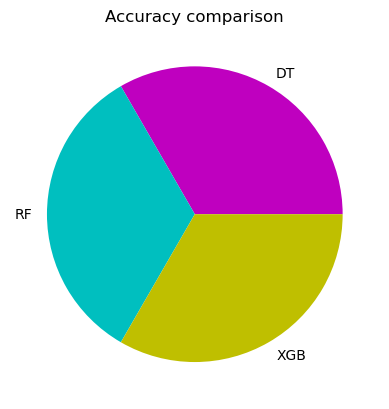

In [77]:
Accuracy = [score,scoreRF,scorexgb]
color_code = ['m','c','y']
deviate_fraction = [0,0,0]
Algorithm = ['DT','RF','XGB']
plt.pie(Accuracy,colors=color_code,labels=Algorithm,explode=deviate_fraction)
plt.title('Accuracy comparison')
plt.show()
